In [ ]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install -U scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd
housing_data = pd.read_csv('/content/Copy of Chapter 2 - housing.csv')
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing_data.info()
#Gives the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
dataa = housing_data.ocean_proximity.value_counts()
dataa

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<Axes: >

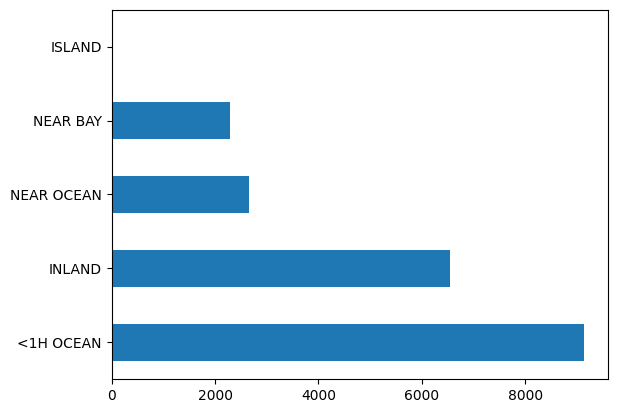

In [ ]:
dataa.plot(kind='barh')

In [ ]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

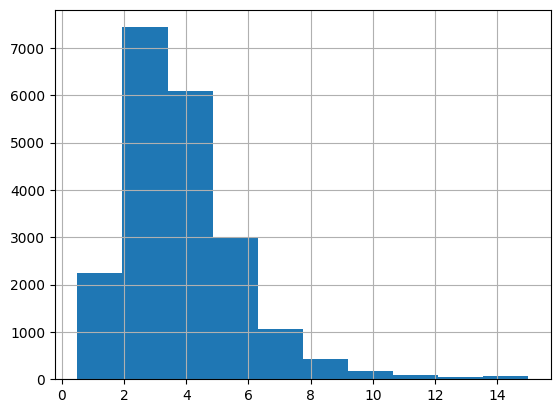

In [ ]:
housing_data['median_income'].hist()

In [ ]:
housing_data['income_cat'] = pd.cut(housing_data['median_income'], bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf], labels = [1, 2, 3, 4, 5])
housing_data['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<Axes: >

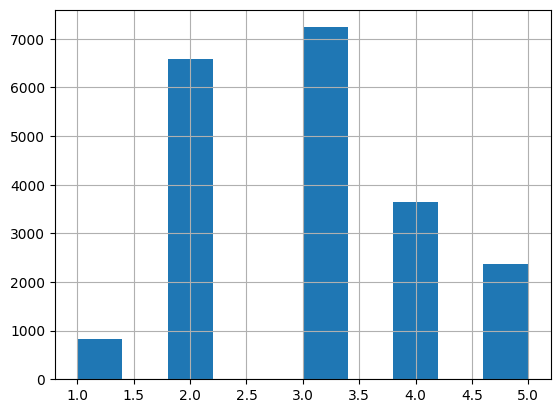

In [ ]:
housing_data['income_cat'].hist()

In [ ]:
Y = housing_data['median_house_value']
X = housing_data.drop('median_house_value', axis = 0)
X.info()

NameError: name 'housing_data' is not defined

In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


**Split** **Datasets**




<Axes: >

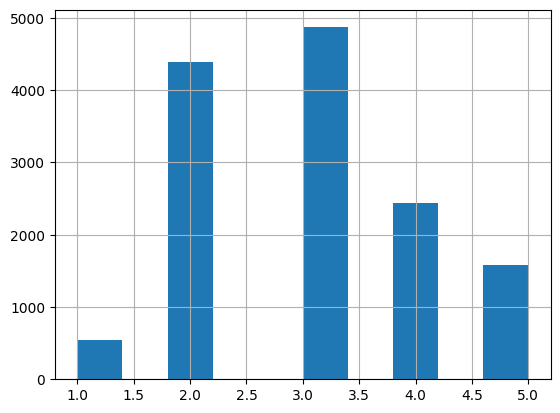

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)
X_train['income_cat'].hist()

<Axes: >

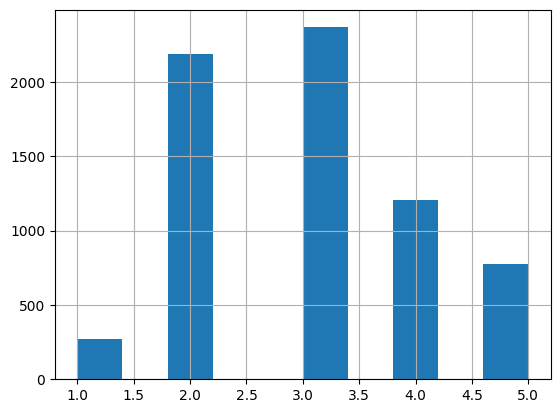

In [ ]:
X_test['income_cat'].hist()

**Stratified** **Split**

In [ ]:
#We use it when the distribution is not same in testing, training data.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state= 42)
for train_index, test_index in split.split(housing_data, housing_data['income_cat']):
  strat_train_set = housing_data.loc[train_index]
  strat_test_set = housing_data.loc[test_index]

<Axes: >

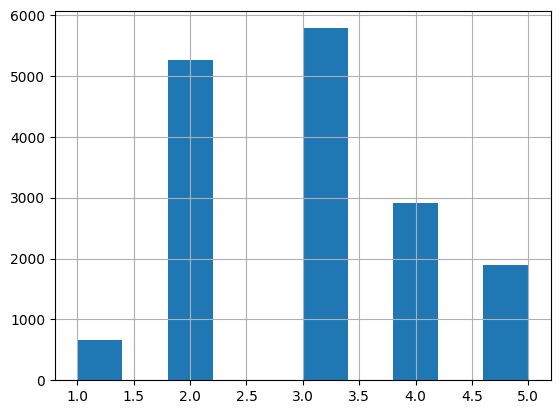

In [ ]:
strat_train_set['income_cat'].hist()

<Axes: >

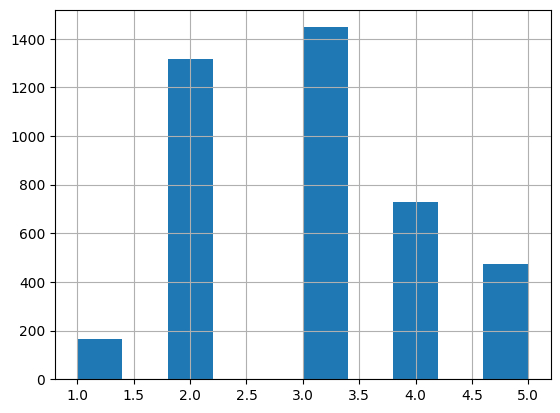

In [ ]:
strat_test_set['income_cat'].hist()

In [ ]:
strat_test_set['income_cat'].value_counts()/ len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
housing_data['income_cat'].value_counts() / len(housing_data)


3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [ ]:
#Dropping the Income category
strat_train_set.drop("income_cat", axis = "columns", inplace = True)
strat_test_set.drop("income_cat", axis = "columns", inplace = True)

**Visualizing our Data**

In [ ]:
## Histograms

In [ ]:
housing = strat_train_set.copy()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

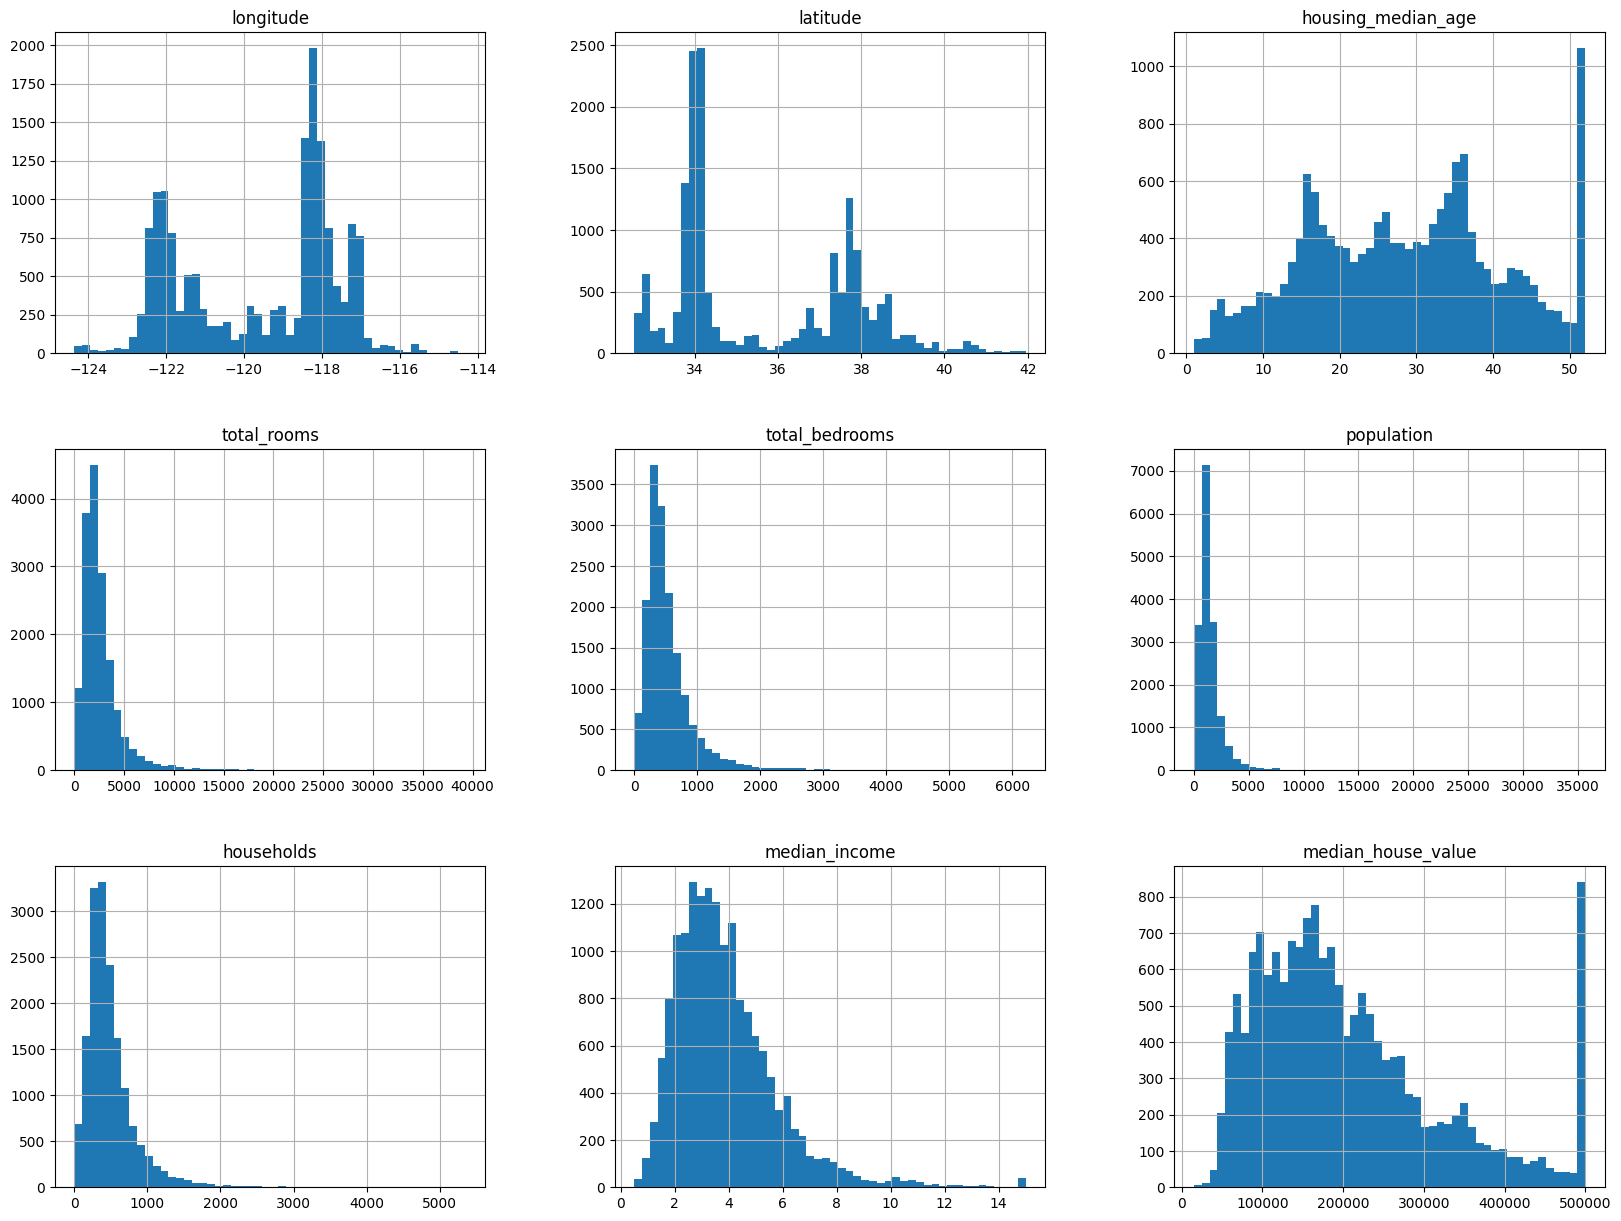

In [ ]:
housing.hist(bins = 50, figsize = (20, 15))

<Axes: >

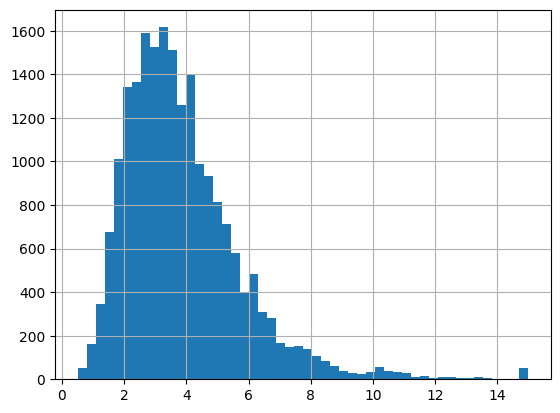

In [ ]:
housing_data['median_income'].hist(bins = 50)

**Correlation** **Matrices**

In [ ]:
housing.corr()

<ipython-input-29-d2be9c065d6d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


<ipython-input-30-801a06d71645>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = housing.corr()


<Axes: >

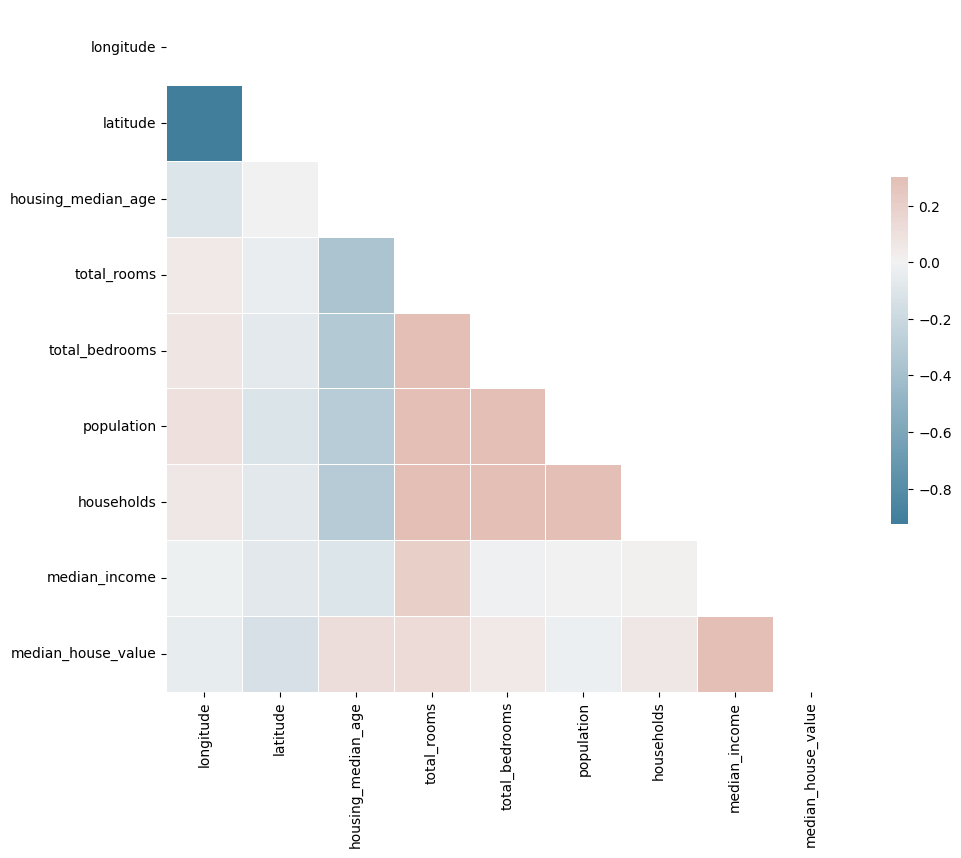

In [ ]:
import seaborn as sns
corr = housing.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
f, ax = plt.subplots(figsize = (11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap= True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center =0, square = True, linewidths = .5, cbar_kws={"shrink": .5})

**Preparing Data for Machine Learning**

In [ ]:
housing = strat_train_set.drop("median_house_value", axis =1)
housing_labels = strat_train_set["median_house_value"].copy()

**Dealing with Missing Values**

In [ ]:
#We can deal with missing values in 3 ways
# 1. Delete the NA/NULL values
# 2. Delete the Column with NA/NULL values
# 3. Impute with statistical values depending upon the data like mean, mode,median

In [ ]:
sample_incomplete_rows = housing[housing.isnull().any(axis =1)]
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,INLAND
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,NaN,4956.0,1483.0,5.5061,<1H OCEAN
16757,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546,NEAR OCEAN


In [ ]:
#Using option3 for imputing the data
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace = True)
sample_incomplete_rows

<ipython-input-34-d30d47e7c2d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_incomplete_rows["total_bedrooms"].fillna(median, inplace = True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,433.0,3207.0,1012.0,4.0767,INLAND
4691,-118.37,34.07,50.0,2519.0,433.0,1117.0,516.0,4.3667,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,433.0,4956.0,1483.0,5.5061,<1H OCEAN
16757,-122.48,37.70,33.0,4492.0,433.0,3477.0,1537.0,3.0546,NEAR OCEAN


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= "median")

In [ ]:
housing_num = housing.select_dtypes(include=[np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.strategy

'median'

**Encoding Categorical Values**

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [ ]:
#Encoding the Categorical Values of "Ocean Proximity"
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse = False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

**Feature Engineering**

In [ ]:
def feature_engineering(data):
  data["bedrooms_per_household"] = data["total_bedrooms"] / data["households"]
  data["population_per_household"] = data["population"] / data["households"]
  data["rooms_per_household"] = data["total_rooms"] / data["households"]

  return data

In [ ]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

**Scaling Our Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

Transform our data using the pipeline created

In [ ]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()
def data_transformations(data):
  #Separate lables if exist
  if "median_house_value" in data.columns:
    labels = data["median_house_value"]
    data = data.drop("median_house_value", axis =1)
  else:
    labels = None
  #Feature Engineering
  feature_engineered_data = feature_engineering(data)
  features = list(feature_engineered_data.columns)

  #Creating a list of our features for future use
  #Imputing Data
  from sklearn.impute import SimpleImputer
  imputer = SimpleImputer(strategy= "median")
  housing_num = feature_engineered_data.select_dtypes(include = [np.number])
  imputed = imputer.fit_transform(housing_num)
  ###Encoding Categorical Data
  housing_cat = feature_engineered_data.select_dtypes(exclude = [np.number])

  from sklearn.preprocessing import OneHotEncoder
  cat_encoder = OneHotEncoder(sparse= False)
  housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
  features = features + cat_encoder.categories_[0].tolist()
  features.remove("ocean_proximity") #We're encoding this variable, so we don't need it in our list anymore

  ###Scaling Numerical Data
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  housing_scaled = scaler.fit_transform(imputed)

  ###concatening all Data
  output = np.hstack([housing_scaled, housing_cat_1hot])
  return output, labels, features

In [ ]:
cat_encoder.categories_[0].tolist()

# **Training** **the Model**

In [ ]:
train_data, train_labels, features = data_transformations(strat_train_set)
train_data

**bold text**

In [ ]:
features

In [ ]:
test_data, test_labels, features = data_transformations(strat_test_set)
test_data

In [ ]:
### Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_data, train_labels)

In [ ]:
import pandas as pd
#Compare Against some Test Data
original_values = test_labels[:5]
predicted_values = lin_reg.predict(test_data[:5])

comparision_dataframe = pd.DataFrame(data = {"Orignial Values": original_values, "Predicted Values":predicted_values, "Differences": original_values - predicted_values})
comparision_dataframe



In [ ]:
#Root Mean Squared Error
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(original_values, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state= 42)
tree_reg.fit(train_data, train_labels)

In [ ]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

**K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_data, train_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard Deviation:", scores.std())

display_scores(tree_rmse_scores)

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
forest_reg.fit(train_data, train_labels)

In [ ]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_data, train_labels, scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:
scores = cross_val_score(lin_reg, train_data, train_labels, scoring = "neg_mean_squared_error", cv = 10)
pd.Series(np.sqrt(-scores)).describe()

**Fine_tuning the Model**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    #try 12 (3x4) combinations of hyperparameters
    {'n_estimators': [3, 10 , 30], 'max_features' : [2, 4, 6, 8]},
    #then try 6 (2x3) combinations with bootstrap set as False
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor(random_state = 42)

  #train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                             scoring = 'neg_mean_squared_error',
                             return_train_score = True)
grid_search.fit(train_data, train_labels)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)


In [ ]:
pd.DataFrame(grid_search.cv_results_)

**Randomized** **Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
params_distribs = {
    'n_estimators' : randint(low = 1, high = 200),
    'max_features' : randint(low = 1, high = 8),
}
forest_reg = RandomForestRegressor(random_state = 42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions= params_distribs, n_iter = 10, cv = 5, scoring = 'neg_mean_squared_error', random_state = 42)
rnd_search.fit(train_data, train_labels)

In [ ]:
  cvres = rnd_search.cv_results_
  for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
      print(np.sqrt(-mean_score), params)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

**Feature Importance List**

In [ ]:
feature_importance_list = list(zip(features, feature_importances.tolist()))
feature_importance_list

In [ ]:
plt.barh(y= features, width = feature_importances.tolist())

In [ ]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_data)

final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse